<a href="https://colab.research.google.com/github/dyutivartak/ML-II_Pracs/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [4]:
max_review_length = 400
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [5]:
import tensorflow as tf
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160032    
                                                                 
 lstm (LSTM)                 (None, 10)                1720      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 161,763
Trainable params: 161,763
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
98/98 [==============================] - 34s 317ms/step - loss: 0.6111 - accuracy: 0.7096 - val_loss: 0.5209 - val_accuracy: 0.7664
Epoch 2/10
98/98 [==============================] - 30s 312ms/step - loss: 0.4186 - accuracy: 0.8408 - val_loss: 0.3880 - val_accuracy: 0.8476
Epoch 3/10
98/98 [==============================] - 30s 304ms/step - loss: 0.3499 - accuracy: 0.8673 - val_loss: 0.4151 - val_accuracy: 0.8200
Epoch 4/10
98/98 [==============================] - 29s 300ms/step - loss: 0.3393 - accuracy: 0.8663 - val_loss: 0.3795 - val_accuracy: 0.8394
Epoch 5/10
98/98 [==============================] - 33s 334ms/step - loss: 0.2921 - accuracy: 0.8910 - val_loss: 0.3481 - val_accuracy: 0.8587
Epoch 6/10
98/98 [==============================] - 41s 416ms/step - loss: 0.2583 - accuracy: 0.9078 - val_loss: 0.3494 - val_accuracy: 0.8586
Epoch 7/10
98/98 [==============================] - 35s 359ms/step - loss: 0.2325 - accuracy: 0.9190 - val_loss: 0.3487 - val_accuracy: 0.8604

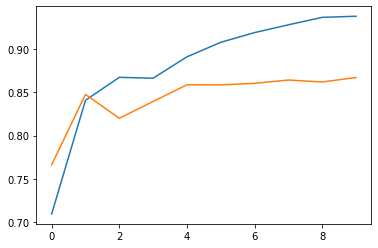

In [8]:
import matplotlib.pyplot as plt
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

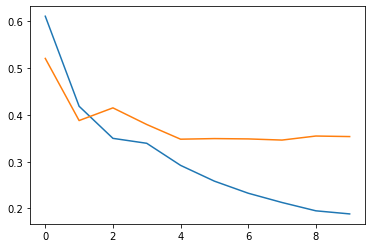

In [9]:
import matplotlib.pyplot as plt
y1=hist.history['loss']
y2=hist.history['val_loss']
plt.plot(y1)
plt.plot(y2)

In [10]:
pred=model.predict(X_test)
print(pred)

782/782 [==============================] - 21s 26ms/step
[[0.06608769]
 [0.9720952 ]
 [0.8715396 ]
 ...
 [0.05281102]
 [0.5225759 ]
 [0.10102948]]
